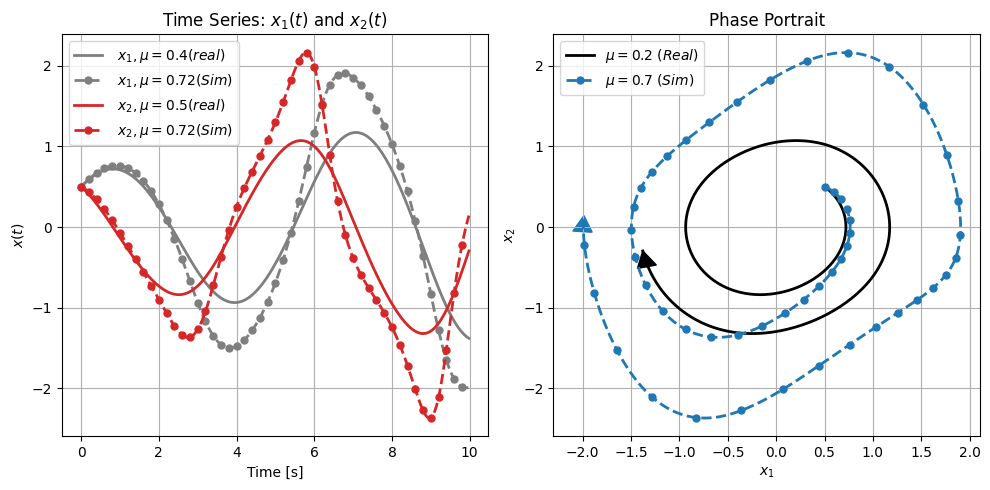

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Reload data for mu=0.7 (real)
data_sim = np.load("results/Real_vdp_mu0.7.npz")
t = data_sim['t']
x1_sim = data_sim['x1']
x2_sim = data_sim['x2']

# Reload data for mu=0.5 (approximate modeling)
data_real = np.load("results/Real_vdp_mu0.2.npz")
x1_real = data_real['x1']
x2_real = data_real['x2']

plt.figure(figsize=(10, 5))

# ------------------------------------------------------------------------
# 1) Time Series Plot: Distinguish both mu and variable (x1, x2)
plt.subplot(1, 2, 1)

plt.plot(t, x1_real, label=r'$\ x_1, \mu=0.4(real)$', color='C7', linewidth=2)
plt.plot(t, x1_sim, '--o', label=r'$\ x_1, \mu=0.72(Sim)$', color='C7',
         linewidth=2, markevery=10, markersize=5)

plt.plot(t, x2_real, label=r'$\ x_2, \mu=0.5(real)$', color='C3', linewidth=2)
plt.plot(t, x2_sim, '--o', label=r'$\ x_2, \mu=0.72(Sim)$', color='C3',
         linewidth=2, markevery=10, markersize=5)

plt.xlabel('Time [s]')
plt.ylabel('$x(t)$')
plt.title('Time Series: $x_1(t)$ and $x_2(t)$')
plt.legend()
plt.grid(True)

# ------------------------------------------------------------------------
# 2) Phase Portrait: x1 vs. x2 for each mu
plt.subplot(1, 2, 2)

# --- Plot real trajectory ---
plt.plot(x1_real, x2_real, '-', label=r'$\mu=0.2\ (Real)$', color='black', linewidth=2)

# Add arrow at end of real trajectory
dx_real = x1_real[-1] - x1_real[-2]
dy_real = x2_real[-1] - x2_real[-2]
plt.arrow(x1_real[-2], x2_real[-2], dx_real, dy_real,
          head_width=0.2, head_length=0.2,
          fc='black', ec='black', length_includes_head=True)

# --- Plot simulated trajectory ---
plt.plot(x1_sim, x2_sim, '--o', label=r'$\mu=0.7\ (Sim)$', color='C0',
         linewidth=2, markevery=10, markersize=5)

# Add arrow at end of simulated trajectory
dx_sim = x1_sim[-1] - x1_sim[-2]
dy_sim = x2_sim[-1] - x2_sim[-2]
plt.arrow(x1_sim[-2], x2_sim[-2], dx_sim, dy_sim,
          head_width=0.2, head_length=0.2,
          fc='C0', ec='C0', length_includes_head=True)


plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Phase Portrait')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

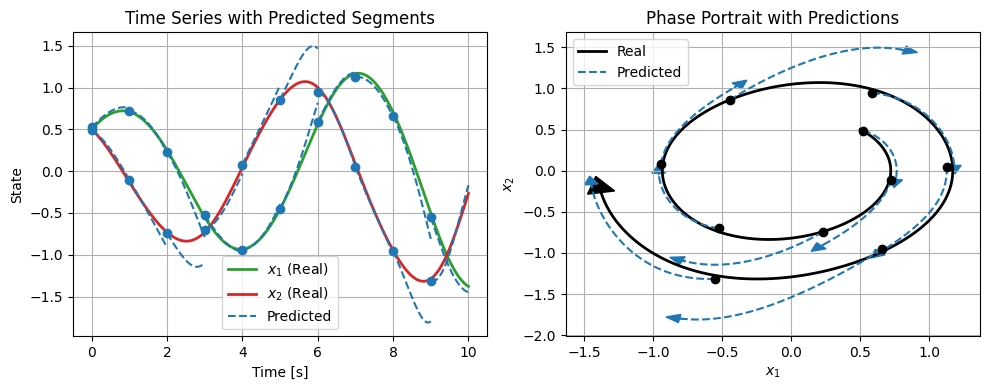

In [24]:
# ------------------------------------------------------------------------------
# Plotting
import os
segment_dir = f"results/segments_naive"
real_path = "results/Real_Online.npy"

# ------------------------------------------------------------------------------
# Define color palette for methods
color_naive = 'C0'
color_real = 'black'


real = np.load(real_path)
t = real[:, 0]
x1 = real[:, 1]
x2 = real[:, 2]

segment_files = sorted([f for f in os.listdir(segment_dir) if f.endswith(".npy")])
segments = [np.load(os.path.join(segment_dir, f)) for f in segment_files]

plt.figure(figsize=(10, 4))

# Time series
plt.subplot(1, 2, 1)
plt.plot(t, x1, label=r'$x_1$ (Real)', linewidth=2, color='C2')
plt.plot(t, x2, label=r'$x_2$ (Real)', linewidth=2, color='C3')

for i, seg in enumerate(segments):
    seg_t = t[i * 50: i * 50 + 51]
    plt.plot(seg_t, seg[:, 0], '--', color=color_naive, linewidth=1.5)
    plt.plot(seg_t, seg[:, 1], '--', color=color_naive, linewidth=1.5)
    plt.plot(seg_t[0], seg[0, 0], 'o', color=color_naive)
    plt.plot(seg_t[0], seg[0, 1], 'o', color=color_naive)
plt.plot([], [], '--', color=color_naive, label='Predicted')
plt.xlabel("Time [s]")
plt.ylabel("State")
plt.title("Time Series with Predicted Segments")
plt.legend()
plt.grid(True)

# Phase portrait
plt.subplot(1, 2, 2)
plt.plot(x1, x2, label='Real', linewidth=2, color=color_real)
dx_real = x1[-1] - x1[-2]
dy_real = x2[-1] - x2[-2]
plt.arrow(x1[-2], x2[-2], dx_real, dy_real, head_width=0.2, head_length=0.2, fc=color_real, ec=color_real)

for seg in segments:
    plt.plot(seg[:, 0], seg[:, 1], '--', color=color_naive)
    plt.plot(seg[0, 0], seg[0, 1], 'o', color=color_real)
    dx = seg[-1, 0] - seg[-2, 0]
    dy = seg[-1, 1] - seg[-2, 1]
    plt.arrow(seg[-2, 0], seg[-2, 1], dx, dy, head_width=0.1, head_length=0.1, fc=color_naive, ec=color_naive)

plt.plot([], [], '--', color=color_naive, label='Predicted')
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Phase Portrait with Predictions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

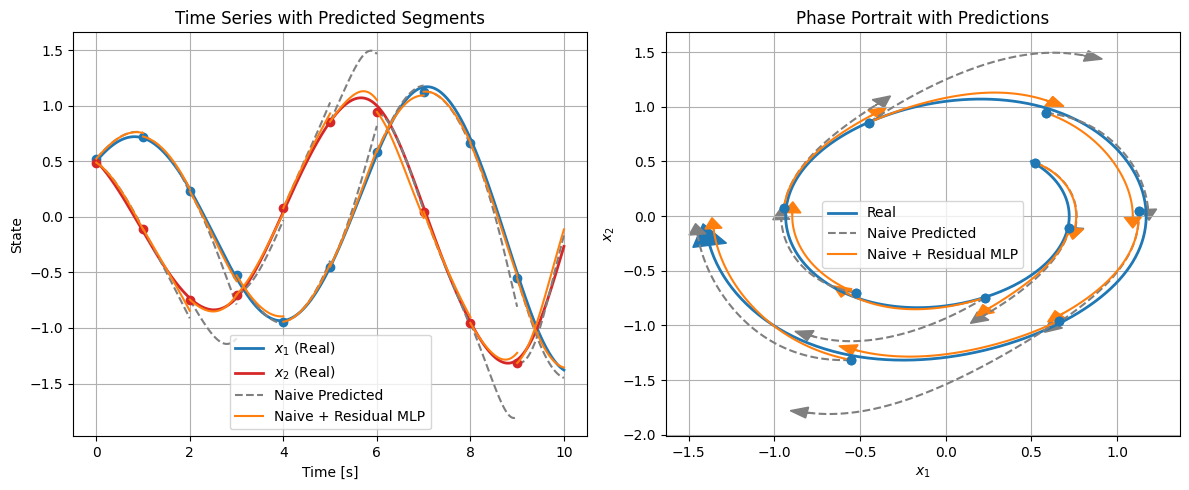

Naive Avg RMSE:            0.0984 ± 0.0823
Naive + Residual MLP RMSE: 0.0396 ± 0.0181


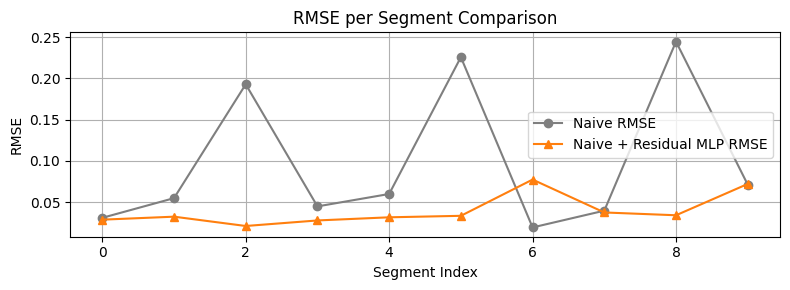

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# ------------------------------------------------------------------------------
# Load ground truth
real_path = "results/Real_Online.npy"
real = np.load(real_path)
t = real[:, 0]
x1 = real[:, 1]
x2 = real[:, 2]

# ------------------------------------------------------------------------------
# Define color palette for methods
color_naive = 'C7'
color_lightmlp = 'C1'

# ------------------------------------------------------------------------------
# Load naive segments
seg_dir_naive = "results/segments_naive"
files_naive = sorted([f for f in os.listdir(seg_dir_naive) if f.endswith(".npy")])
segments_naive = [np.load(os.path.join(seg_dir_naive, f)) for f in files_naive]

# ------------------------------------------------------------------------------
# Load Naive + Residual MLP segments
seg_dir_lightmlp = "results/segments_naiveLightmlp"
files_lightmlp = sorted([f for f in os.listdir(seg_dir_lightmlp) if f.endswith(".npy")])
segments_lightmlp = [np.load(os.path.join(seg_dir_lightmlp, f)) for f in files_lightmlp]

# ------------------------------------------------------------------------------
# Plotting
plt.figure(figsize=(12, 5))

# --- Time Series Plot ---
plt.subplot(1, 2, 1)
plt.plot(t, x1, label=r'$x_1$ (Real)', linewidth=2, color='C0')
plt.plot(t, x2, label=r'$x_2$ (Real)', linewidth=2, color='C3')

for i, seg in enumerate(segments_naive):
    seg_t = t[i * 50: i * 50 + 51]
    plt.plot(seg_t, seg[:, 0], '--', color=color_naive, linewidth=1.5)
    plt.plot(seg_t, seg[:, 1], '--', color=color_naive, linewidth=1.5)
    plt.plot(seg_t[0], seg[0, 0], 'o', color='C0')
    plt.plot(seg_t[0], seg[0, 1], 'o', color='C3')

for i, seg in enumerate(segments_lightmlp):
    seg_t = t[i * 50: i * 50 + 51]
    plt.plot(seg_t, seg[:, 0], '-', color=color_lightmlp, linewidth=1.5)
    plt.plot(seg_t, seg[:, 1], '-', color=color_lightmlp, linewidth=1.5)

plt.plot([], [], '--', color=color_naive, label='Naive Predicted')
plt.plot([], [], '-', color=color_lightmlp, label='Naive + Residual MLP')
plt.xlabel("Time [s]")
plt.ylabel("State")
plt.title("Time Series with Predicted Segments")
plt.legend()
plt.grid(True)

# --- Phase Portrait Plot ---
plt.subplot(1, 2, 2)
plt.plot(x1, x2, label='Real', linewidth=2, color='C0')

dx_real = x1[-1] - x1[-2]
dy_real = x2[-1] - x2[-2]
plt.arrow(x1[-2], x2[-2], dx_real, dy_real, head_width=0.2, head_length=0.2, fc='C0', ec='C0')

for seg in segments_naive:
    plt.plot(seg[:, 0], seg[:, 1], '--', color=color_naive)
    plt.plot(seg[0, 0], seg[0, 1], 'o', color='C0')
    dx = seg[-1, 0] - seg[-2, 0]
    dy = seg[-1, 1] - seg[-2, 1]
    plt.arrow(seg[-2, 0], seg[-2, 1], dx, dy, head_width=0.1, head_length=0.1, fc=color_naive, ec=color_naive)

for seg in segments_lightmlp:
    plt.plot(seg[:, 0], seg[:, 1], '-', color=color_lightmlp)
    plt.plot(seg[0, 0], seg[0, 1], 'o', color='C0')
    dx = seg[-1, 0] - seg[-2, 0]
    dy = seg[-1, 1] - seg[-2, 1]
    plt.arrow(seg[-2, 0], seg[-2, 1], dx, dy, head_width=0.1, head_length=0.1, fc=color_lightmlp, ec=color_lightmlp)

plt.plot([], [], '--', color=color_naive, label='Naive Predicted')
plt.plot([], [], '-', color=color_lightmlp, label='Naive + Residual MLP')
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Phase Portrait with Predictions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------
# Compute RMSE
naive_errors = []
lightmlp_errors = []

for i, (seg_naive, seg_light) in enumerate(zip(segments_naive, segments_lightmlp)):
    seg_real = real[i * 50: i * 50 + 51, 1:3]
    error_naive = np.sqrt(mean_squared_error(seg_real, seg_naive))
    error_light = np.sqrt(mean_squared_error(seg_real, seg_light))
    naive_errors.append(error_naive)
    lightmlp_errors.append(error_light)

naive_errors = np.array(naive_errors)
lightmlp_errors = np.array(lightmlp_errors)

print(f"Naive Avg RMSE:            {naive_errors.mean():.4f} ± {naive_errors.std():.4f}")
print(f"Naive + Residual MLP RMSE: {lightmlp_errors.mean():.4f} ± {lightmlp_errors.std():.4f}")

# ------------------------------------------------------------------------------
# RMSE comparison plot
plt.figure(figsize=(8, 3))
plt.plot(naive_errors, label="Naive RMSE", marker='o', color=color_naive)
plt.plot(lightmlp_errors, label="Naive + Residual MLP RMSE", marker='^', color=color_lightmlp)
plt.xlabel("Segment Index")
plt.ylabel("RMSE")
plt.title("RMSE per Segment Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


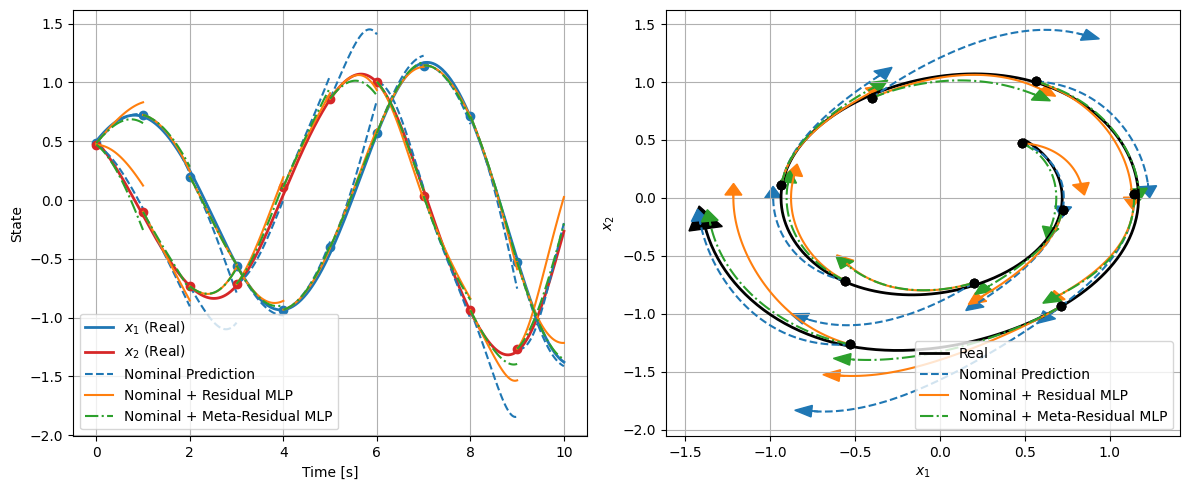

Nominal Avg RMSE:                  0.0963 ± 0.0772
Nominal + Residual MLP RMSE:       0.0695 ± 0.0388
Nominal + Meta-Residual MLP RMSE:  0.0392 ± 0.0137


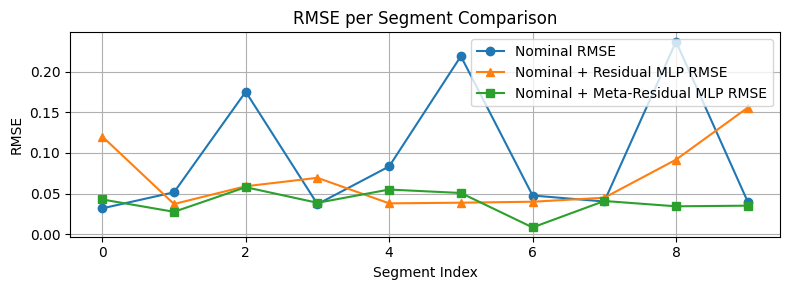

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# ------------------------------------------------------------------------------
# Load ground truth
real_path = "results/Real_Online.npy"
real = np.load(real_path)
t = real[:, 0]
x1 = real[:, 1]
x2 = real[:, 2]

# ------------------------------------------------------------------------------
# Define color palette for methods
color_naive = 'C0'
color_lightmlp = 'C1'
color_metamlp = 'C2'
color_real = 'black'

# ------------------------------------------------------------------------------
# Load naive segments
seg_dir_naive = "results/segments_naive"
segments_naive = [np.load(os.path.join(seg_dir_naive, f))
                  for f in sorted(os.listdir(seg_dir_naive)) if f.endswith(".npy")]

# Load Naive + Residual MLP segments
seg_dir_lightmlp = "results/segments_naiveLightmlp"
segments_lightmlp = [np.load(os.path.join(seg_dir_lightmlp, f))
                     for f in sorted(os.listdir(seg_dir_lightmlp)) if f.endswith(".npy")]

# Load Naive + Meta-trained Residual MLP segments
seg_dir_metamlp = "results/segments_naiveMetamlp"
segments_metamlp = [np.load(os.path.join(seg_dir_metamlp, f))
                    for f in sorted(os.listdir(seg_dir_metamlp)) if f.endswith(".npy")]

# ------------------------------------------------------------------------------
# Plotting
plt.figure(figsize=(12, 5))

# --- Time Series Plot ---
plt.subplot(1, 2, 1)
plt.plot(t, x1, label=r'$x_1$ (Real)', linewidth=2, color='C0')
plt.plot(t, x2, label=r'$x_2$ (Real)', linewidth=2, color='C3')

for i, seg in enumerate(segments_naive):
    seg_t = t[i * 50: i * 50 + 51]
    plt.plot(seg_t, seg[:, 0], '--', color=color_naive, linewidth=1.5)
    plt.plot(seg_t, seg[:, 1], '--', color=color_naive, linewidth=1.5)
    plt.plot(seg_t[0], seg[0, 0], 'o', color='C0')
    plt.plot(seg_t[0], seg[0, 1], 'o', color='C3')

for i, seg in enumerate(segments_lightmlp):
    seg_t = t[i * 50: i * 50 + 51]
    plt.plot(seg_t, seg[:, 0], '-', color=color_lightmlp, linewidth=1.5)
    plt.plot(seg_t, seg[:, 1], '-', color=color_lightmlp, linewidth=1.5)

for i, seg in enumerate(segments_metamlp):
    seg_t = t[i * 50: i * 50 + 51]
    plt.plot(seg_t, seg[:, 0], '-.', color=color_metamlp, linewidth=1.5)
    plt.plot(seg_t, seg[:, 1], '-.', color=color_metamlp, linewidth=1.5)

plt.plot([], [], '--', color=color_naive, label='Nominal Prediction')
plt.plot([], [], '-', color=color_lightmlp, label='Nominal + Residual MLP')
plt.plot([], [], '-.', color=color_metamlp, label='Nominal + Meta-Residual MLP')
plt.xlabel("Time [s]")
plt.ylabel("State")
#plt.title("Time Series with Predicted Segments")
plt.legend()
plt.grid(True)

# --- Phase Portrait Plot ---
plt.subplot(1, 2, 2)
plt.plot(x1, x2, label='Real', linewidth=2, color=color_real)
plt.arrow(x1[-2], x2[-2], x1[-1] - x1[-2], x2[-1] - x2[-2],
          head_width=0.2, head_length=0.2, fc=color_real, ec=color_real)

for seg in segments_naive:
    plt.plot(seg[:, 0], seg[:, 1], '--', color=color_naive)
    plt.plot(seg[0, 0], seg[0, 1], 'o', color=color_real)
    dx = seg[-1, 0] - seg[-2, 0]
    dy = seg[-1, 1] - seg[-2, 1]
    plt.arrow(seg[-2, 0], seg[-2, 1], dx, dy, head_width=0.1, head_length=0.1, fc=color_naive, ec=color_naive)

for seg in segments_lightmlp:
    plt.plot(seg[:, 0], seg[:, 1], '-', color=color_lightmlp)
    plt.plot(seg[0, 0], seg[0, 1], 'o', color=color_real)
    dx = seg[-1, 0] - seg[-2, 0]
    dy = seg[-1, 1] - seg[-2, 1]
    plt.arrow(seg[-2, 0], seg[-2, 1], dx, dy, head_width=0.1, head_length=0.1, fc=color_lightmlp, ec=color_lightmlp)

for seg in segments_metamlp:
    plt.plot(seg[:, 0], seg[:, 1], '-.', color=color_metamlp)
    plt.plot(seg[0, 0], seg[0, 1], 'o', color=color_real)
    dx = seg[-1, 0] - seg[-2, 0]
    dy = seg[-1, 1] - seg[-2, 1]
    plt.arrow(seg[-2, 0], seg[-2, 1], dx, dy, head_width=0.1, head_length=0.1, fc=color_metamlp, ec=color_metamlp)

plt.plot([], [], '--', color=color_naive, label='Nominal Prediction')
plt.plot([], [], '-', color=color_lightmlp, label='Nominal + Residual MLP')
plt.plot([], [], '-.', color=color_metamlp, label='Nominal + Meta-Residual MLP')
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
#plt.title("Phase Portrait with Predictions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("results/vanderpol_results.png", dpi=300, bbox_inches="tight")
plt.show()

# ------------------------------------------------------------------------------
# Compute RMSE
naive_errors = []
lightmlp_errors = []
metamlp_errors = []

for i, (seg_naive, seg_light, seg_meta) in enumerate(zip(segments_naive, segments_lightmlp, segments_metamlp)):
    seg_real = real[i * 50: i * 50 + 51, 1:3]
    naive_errors.append(np.sqrt(mean_squared_error(seg_real, seg_naive)))
    lightmlp_errors.append(np.sqrt(mean_squared_error(seg_real, seg_light)))
    metamlp_errors.append(np.sqrt(mean_squared_error(seg_real, seg_meta)))

naive_errors = np.array(naive_errors)
lightmlp_errors = np.array(lightmlp_errors)
metamlp_errors = np.array(metamlp_errors)

print(f"Nominal Avg RMSE:                  {naive_errors.mean():.4f} ± {naive_errors.std():.4f}")
print(f"Nominal + Residual MLP RMSE:       {lightmlp_errors.mean():.4f} ± {lightmlp_errors.std():.4f}")
print(f"Nominal + Meta-Residual MLP RMSE:  {metamlp_errors.mean():.4f} ± {metamlp_errors.std():.4f}")

# ------------------------------------------------------------------------------
# RMSE comparison plot
plt.figure(figsize=(8, 3))
plt.plot(naive_errors, label="Nominal RMSE", marker='o', color=color_naive)
plt.plot(lightmlp_errors, label="Nominal + Residual MLP RMSE", marker='^', color=color_lightmlp)
plt.plot(metamlp_errors, label="Nominal + Meta-Residual MLP RMSE", marker='s', color=color_metamlp)
plt.xlabel("Segment Index")
plt.ylabel("RMSE")
plt.title("RMSE per Segment Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
import numpy as np

# Define (mean, std) pairs for two methods
data1 = [
    (0.0342, 0.0194),
    (0.0396, 0.0181),
    (0.0442, 0.0244),
    (0.0628, 0.0328),
    (0.0399, 0.0158),
    (0.0342, 0.0114),
    (0.0482, 0.0266),
    (0.0612, 0.0326),
    (0.0695, 0.0388),
    (0.0612, 0.0253),
]

data2 = [
    (0.0322, 0.0110),
    (0.0395, 0.0097),
    (0.0382, 0.0178),
    (0.0330, 0.0167),
    (0.0352, 0.0139),
    (0.0342, 0.0114),
    (0.0377, 0.0176),
    (0.0474, 0.0178),
    (0.0392, 0.0137),
    (0.0401, 0.0149)
]

def analyze(data, label):
    means, stds = zip(*data)
    means = np.array(means)
    stds = np.array(stds)

    mean_of_means = np.mean(means)
    std_of_means = np.std(means)

    mean_of_stds = np.mean(stds)
    std_of_stds = np.std(stds)

    print(f"\n📊 {label}")
    print(f"Mean of means: {mean_of_means:.4f} ± {std_of_means:.4f}")
    print(f"Mean of stds:  {mean_of_stds:.4f} ± {std_of_stds:.4f}")

# Run analysis on both datasets
analyze(data1, "Data lightmlp")
analyze(data2, "Data metamlp")



📊 Data lightmlp
Mean of means: 0.0495 ± 0.0124
Mean of stds:  0.0245 ± 0.0081

📊 Data metamlp
Mean of means: 0.0377 ± 0.0042
Mean of stds:  0.0144 ± 0.0029
